In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import sklearn

In [23]:
data=pd.read_csv("creditcard.csv")

In [24]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [26]:
print(data.shape)

(284807, 31)


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [28]:
#taking only a sample to data to decrease the computation time
data=data.sample(frac=0.1,random_state=1)
print(data.shape)

(28481, 31)


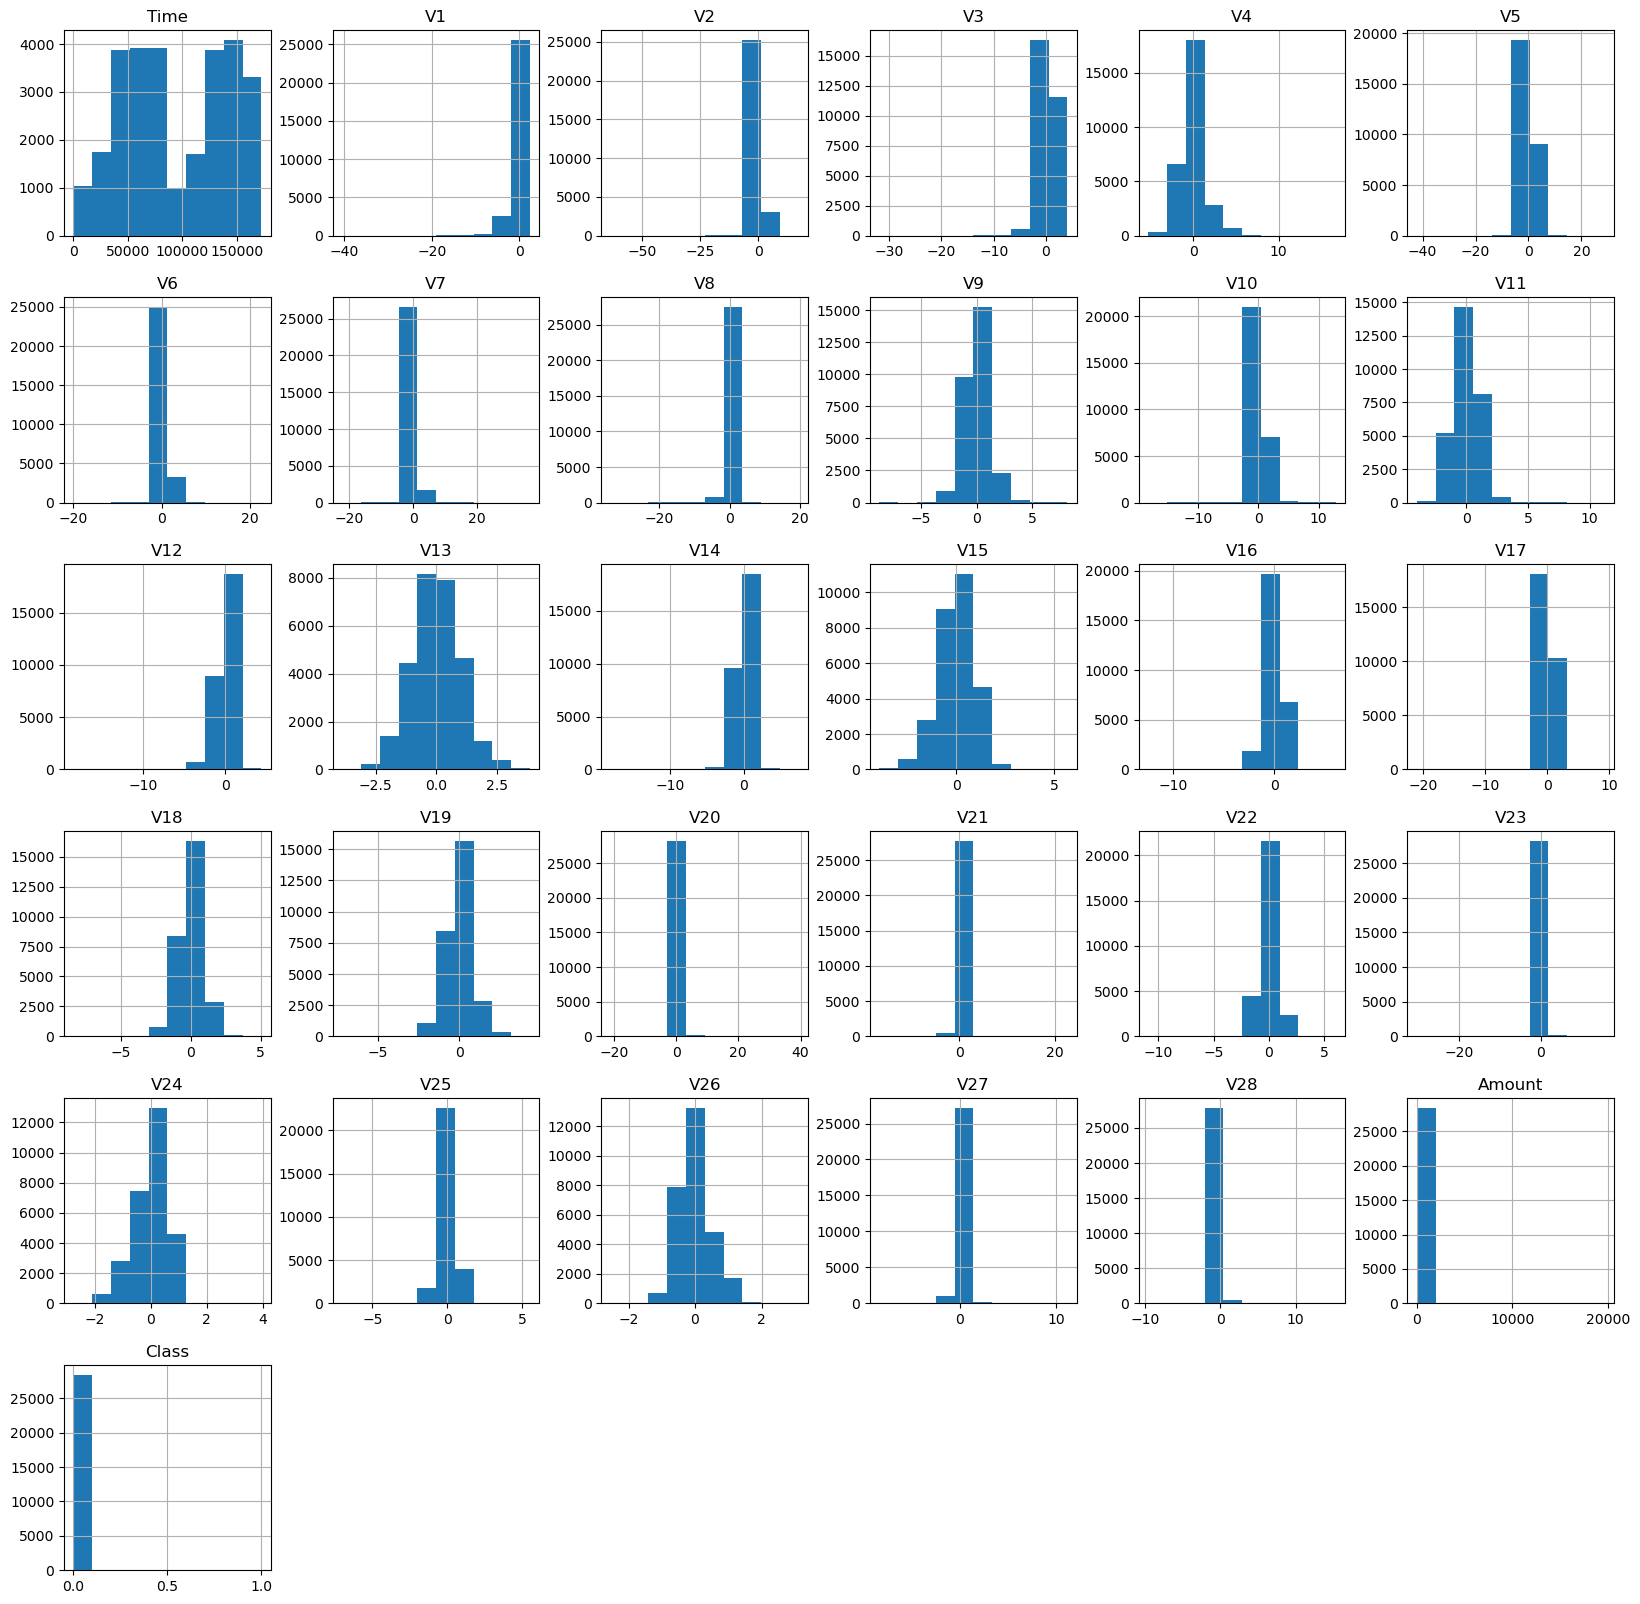

In [29]:
data.hist(figsize=(20,20))
plt.show()

In [44]:
fraud_cases=data[data["Class"] ==1]
valid_cases=data[data["Class"] ==0]

Outlier_fraction=len(fraud_cases)/float(len(valid_cases))
print("Percentage of fraud cases: {:.2f}".format(Outlier_fraction*100))
print("fraud cases {}".format(len(fraud_cases)))
print("valid cases {}".format(len(valid_cases)))

Percentage of fraud cases: 0.17
fraud cases 49
valid cases 28432


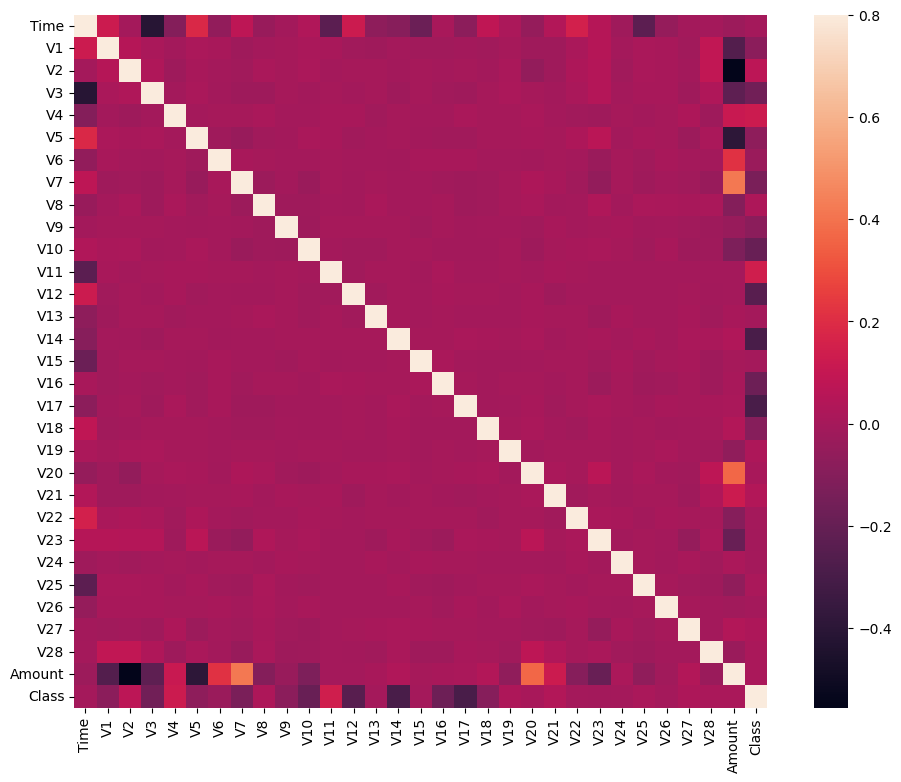

In [36]:
fig=plt.figure(figsize=(12,9))

sns.heatmap(data.corr(),vmax = .8 ,square=True)
plt.show()

In [45]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.126475,-0.001584,-0.413547,-0.104527,0.182205,-0.060483,0.078924,-0.040474,-0.008428,...,0.041323,0.150603,0.047941,-0.020018,-0.229491,-0.048131,-0.005541,-0.004339,-0.026969,-0.005087
V1,0.126475,1.000000,0.048796,0.015452,-0.010592,0.019888,0.006417,-0.020583,-0.003013,0.001658,...,-0.016415,0.014896,0.049447,-0.003709,0.014055,0.007203,-0.011545,0.085035,-0.262703,-0.079820
V2,-0.001584,0.048796,1.000000,0.027270,-0.022539,0.009666,-0.004411,-0.013456,0.015662,0.003456,...,-0.020127,0.021923,0.047591,-0.011386,0.011838,0.005366,-0.009611,0.084873,-0.556401,0.069598
V3,-0.413547,0.015452,0.027270,1.000000,-0.005423,0.013997,-0.006903,-0.024640,-0.025529,0.002525,...,-0.006083,0.014177,0.042603,-0.001883,0.005975,0.006869,-0.017094,0.029973,-0.225099,-0.160051
V4,-0.104527,-0.010592,-0.022539,-0.005423,1.000000,-0.003708,0.002029,0.004432,0.011659,-0.004395,...,-0.004423,-0.011251,-0.017682,0.001829,-0.009692,0.004087,0.024489,-0.024554,0.111692,0.122631
V5,0.182205,0.019888,0.009666,0.013997,-0.003708,1.000000,-0.016656,-0.037463,-0.013263,-0.008506,...,0.002288,0.022065,0.064703,-0.007184,0.006493,0.000048,-0.027934,0.010991,-0.397437,-0.073519
V6,-0.060483,0.006417,-0.004411,-0.006903,0.002029,-0.016656,1.000000,0.006923,0.003695,-0.002762,...,0.004490,-0.003705,-0.036726,0.001428,-0.015012,0.009938,-0.004811,-0.009772,0.213007,-0.035085
V7,0.078924,-0.020583,-0.013456,-0.024640,0.004432,-0.037463,0.006923,1.000000,-0.028291,-0.005510,...,0.007012,-0.013871,-0.055242,0.002899,-0.016941,-0.000075,-0.012973,-0.037593,0.417814,-0.134247
V8,-0.040474,-0.003013,0.015662,-0.025529,0.011659,-0.013263,0.003695,-0.028291,1.000000,-0.018645,...,-0.005651,-0.004195,0.030092,-0.008821,0.017298,0.015385,0.008495,0.015525,-0.102221,0.024896
V9,-0.008428,0.001658,0.003456,0.002525,-0.004395,-0.008506,-0.002762,-0.005510,-0.018645,1.000000,...,0.009462,-0.002297,0.002360,0.007441,-0.009149,-0.003652,-0.011701,-0.026290,-0.039773,-0.079962


In [37]:
columns=data.columns.tolist()

columns=[c for c in columns if c not in ["Class"]]

target="Class"

X=data[columns]
Y=data[target]

print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [38]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=Outlier_fraction,
                                        random_state=1),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=Outlier_fraction)}

In [39]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(fraud_cases)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



<Figure size 900x700 with 0 Axes>